# Dades, probabilitats i estadístiques

In [47]:
# Càrrega de llibreries
import pandas as pd
import statistics as st
from scipy.stats.mstats import gmean
from scipy.stats.mstats import hmean
import matplotlib.pyplot as plt
import seaborn as sns

## Exercici 1
__Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica.__ 

In [48]:
# Importació de la base de dades
dades_bat10 = pd.read_csv('mlbBat10.txt', sep='\t', encoding='UTF-8')
dades_bat10.head()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


<span style='color:blue; font-size:18px'> <b> Descripció de les variables </b> </span>

- G: Nombre de partits jugats
- AB: Nombre d'intents de cop de bat
- R: Nombre de carreres
- H: Nombre de cops de bat
- 2B: Nombre de dobles
- 3B: Nombre de triples
- HR: Nombre de Homeruns
- RBI: Nombre de carreres impulsades (carreres que arriben al home amb un cop de bat)
- TB: Bases totals, 3*HR + 2*3B + 2B + H
- BB: Nombre de Base per boles
- SO: Nombre de Strikeouts
- SB: Nombre de robatoris de base
- CS: Nombre de vegades de robatoris enxampats
- OBP: Percentatge de Bases, freqüència amb que un batedor arriba a la base
- SLG: Productivitat del batedor (TB /AB)
- AVG: Promig de cops de bat (H / AB)

<span style='color:blue; font-size:18px'> <b> Dimensió i informació de la base de dades </b> </span>

In [49]:
# Dimensió de la base de dades
dades_bat10.shape

(1199, 19)

In [50]:
# Informació de la base de dades
dades_bat10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1199 non-null   object 
 1   team      1199 non-null   object 
 2   position  1199 non-null   object 
 3   G         1199 non-null   int64  
 4   AB        1199 non-null   int64  
 5   R         1199 non-null   int64  
 6   H         1199 non-null   int64  
 7   2B        1199 non-null   int64  
 8   3B        1199 non-null   int64  
 9   HR        1199 non-null   int64  
 10  RBI       1199 non-null   int64  
 11  TB        1199 non-null   int64  
 12  BB        1199 non-null   int64  
 13  SO        1199 non-null   int64  
 14  SB        1199 non-null   int64  
 15  CS        1199 non-null   int64  
 16  OBP       1199 non-null   float64
 17  SLG       1199 non-null   float64
 18  AVG       1199 non-null   float64
dtypes: float64(3), int64(13), object(3)
memory usage: 178.1+ KB


<span style='color:blue; font-size:18px'> <b> Càlcul d'estadístics: Nombre de cops de bat (H) </b> </span>

In [51]:
# Moda
st.mode(dades_bat10['H'])

0

In [52]:
sum(dades_bat10['H'] == 0)

407

<span style='color:blue'> La moda (el valor que més es repeteix) és 0 cops de bat i apareix 407 vegades </span>

In [53]:
# Mediana
st.median(dades_bat10['H'])

6

<span style='color:blue'> La mediana (el valor que deixa per sota el 50% de les observacions ordenades) és 6 cops de bat </span>

In [54]:
# Desviació estàdard
st.stdev(dades_bat10['H'])

51.90849836051625

<span style='color:blue'> La desviació estàndard és de 51.9085 cops de bat </span>

In [55]:
# Mitjana aritmètica
dades_bat10['H'].mean()

35.491242702251874

<span style='color:blue'> La mitjana aritmètica és de 35.4912 cops de bat </span>

## Exercici 2
__Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació.__

<span style='color:blue; font-size:18px'> <b> Correlació entre HR (Home Runs) i AVG (promig de cop de bats) </b> </span>

In [56]:
# Correlació
dades_bat10[['HR','AVG']].corr()

,HR,AVG
HR,1.000000,0.385235
AVG,0.385235,1.000000


<span style='color:blue'> Existeix una dependència lineal positiva feble entre HR i AVG, que és de 0.3852. </span>

## Exercici 3
__Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.__

In [57]:
# Matriu de correlacions
dades_corr = dades_bat10.iloc[:,3:]
corr_matrix = dades_corr.corr()
corr_matrix.head()

,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
G,1.000000,0.938213,0.903774,0.924026,0.890881,0.625684,0.765198,0.880960,0.914098,0.858526,0.879365,0.561894,0.629483,0.473870,0.484002,0.463894
AB,0.938213,1.000000,0.970168,0.991519,0.954346,0.662491,0.816416,0.939538,0.979084,0.906541,0.921892,0.614504,0.678982,0.502603,0.513554,0.497166
R,0.903774,0.970168,1.000000,0.977381,0.949386,0.684214,0.859812,0.945531,0.981973,0.925169,0.907874,0.642059,0.684150,0.486126,0.507882,0.476034
H,0.924026,0.991519,0.977381,1.000000,0.964365,0.665552,0.822227,0.945025,0.987289,0.900749,0.897921,0.617696,0.681796,0.498144,0.513439,0.497997
2B,0.890881,0.954346,0.949386,0.964365,1.000000,0.608029,0.836845,0.941710,0.971456,0.890788,0.882539,0.530795,0.592942,0.482109,0.511973,0.477903


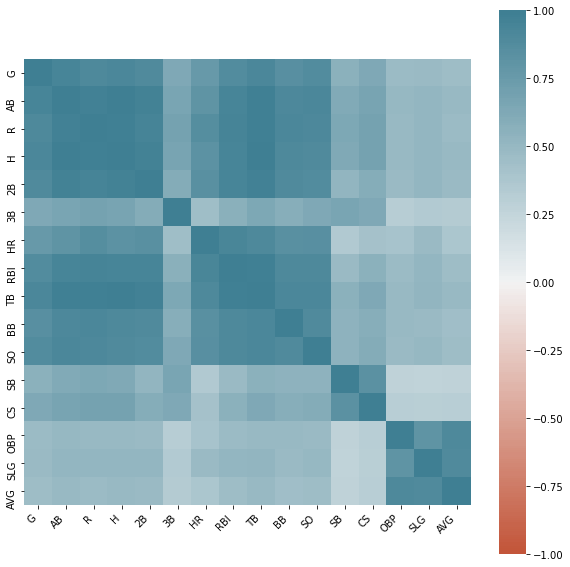

In [58]:
# Gràfic de calor de la matriu de correlacions
fig, ax = plt.subplots(figsize=(10,10))  

ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Exercici 4
__Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.__

<span style='color:blue; font-size:18px'> <b> Càlcul de mitjanes: Partits jugats (G) </b> </span>

In [59]:
# Mitjana geomètrica
gmean(dades_bat10['G'])

23.349599176875284

<span style='color:blue'> La mitjana geomètrica és de 23.3496 partits jugats </span>

In [60]:
# Mitjana harmònica
hmean(dades_bat10['G'])

7.187464926137136

<span style='color:blue'> La mitjana harmònica és de 7.1875 partits jugats </span>